In [1]:
from keylogParser import *
from stat_helpers import *

bigrams = ['th', 'he', 'gh', 'nd', 'ne', 'in', 'er', 'an', 'ng', 'me', 'we', 'is', 'at', 'on', 'es', 'ay', 'or', 'hi']


test_results_oskar = get_pressed_data_diffs(bigrams, read_file('test_oskar'))
test_stats_oskar = get_stats(bigrams, test_results_oskar)
test_results_aoife = get_pressed_data_diffs(bigrams, read_file('test_aoife'))
test_stats_aoife = get_stats(bigrams, test_results_aoife)

test_bigrams = test_stats_oskar['present_bigrams']


print(test_bigrams)



['th', 'he', 'nd', 'in', 'er', 'an', 'ng', 'me', 'we', 'at', 'on', 'es', 'or', 'hi']


## Save the results and stats for each user in variables

In [2]:
users = ['oskar', 'johan', 'aoife', 'luke']
stat_keys = ['std_devs', 'means', 'variances']

results = {}
stats = {}

for user in users:
	results[user] = get_pressed_data_diffs(test_bigrams, read_file(user))
	stats[user] = get_stats(test_bigrams, results[user])

## Print graphs by statistic for each user

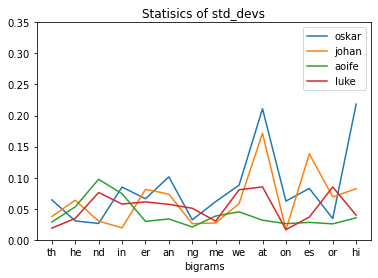

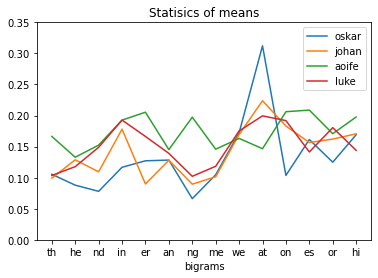

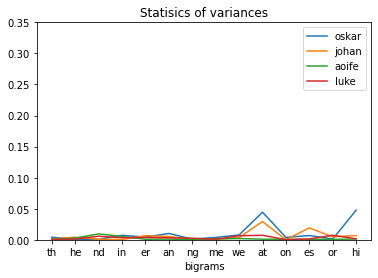

In [3]:
for stat_key in stat_keys:
	print_graph(stats, stat_key, test_bigrams, users)
	

In [4]:
MSE_oskar = {}
MSE_aoife = {}
closest_user_oskar = {'std_devs': '', 'means': '', 'variances': ''}
closest_user_aoife = {'std_devs': '', 'means': '', 'variances': ''}

for user in users:
	MSE_oskar[user] = {}
	MSE_aoife[user] = {}
	for stat_key in stat_keys:
		MSE_oskar[user][stat_key] = mse(stats[user][stat_key], test_stats_oskar[stat_key])
		MSE_aoife[user][stat_key] = mse(stats[user][stat_key], test_stats_aoife[stat_key])
for stat_key in stat_keys:		
	print('MSE for ', stat_key, ':  Oskar = ', MSE['oskar'][stat_key], '/n')
	print('MSE for ', stat_key, ':  Aoife = ', MSE['aoife'][stat_key], '/n')

for stat_key in stat_keys:
	closest_user_oskar[stat_key] = find_closest_user(MSE_oskar, stat_key)
	closest_user_aoife[stat_key] = find_closest_user(MSE_aoife, stat_key)
	print_graph(stats, stat_key, test_bigrams, users)
	print_closest_user_graph(stats, test_stats_oskar, closest_user_oskar[stat_key], stat_key, test_bigrams, 'oskar')
	print_closest_user_graph(stats, test_stats_aoife, closest_user_aoife[stat_key], stat_key, test_bigrams, 'aoife')




ValueError: operands could not be broadcast together with shapes (14,) (17,) 